In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from muon.deep_clustering.clustering import Config, Cluster
from muon.utils.subjects import Subjects
from muon.deep_clustering.mapping import Mapping

import os
import pickle
import math
import logging
import numpy as np
import pandas as pd
import csv
logger = logging.getLogger(__name__)

config = 'mnt/dec/dec_no_labels_2/config_jupyter.json'
config = Config.load(config)
print(config.__dict__)
subjects = pickle.load(open(config.subjects, 'rb'))
# cluster = Cluster.create(subjects, config)

import muon.project.parse_export as pe
agg = pe.Aggregate.load('mh2')

Using TensorFlow backend.


{'momentum': 0.9, 'tol': 0.001, 'subjects': 'mnt/dec/dec_no_labels/subjects.pkl', 'ae_weights': 'mnt/dec/dec_no_labels/ae_weights.h5', 'nodes': [500, 500, 2000, 10], 'maxiter': 20000.0, 'lr': 0.01, 'update_interval': 140, 'n_clusters': 50, 'batch_size': 256, 'save_dir': 'mnt/dec/dec_no_labels', 'rotation': False}


In [2]:
_s = list(agg.data['subjects'].keys())
subjects2 = subjects.subset(_s)
agg.apply_labels(subjects2)
cluster = Cluster.create(subjects2, config)
print('Initializing model')
cluster.initialize()

Initializing model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 499)               0         
_________________________________________________________________
encoder_0 (Dense)            (None, 500)               250000    
_________________________________________________________________
encoder_1 (Dense)            (None, 500)               250500    
_________________________________________________________________
encoder_2 (Dense)            (None, 2000)              1002000   
_________________________________________________________________
encoder_3 (Dense)            (None, 10)                20010     
_________________________________________________________________
clustering (ClusteringLayer) (None, 50)                500       
Total params: 1,523,010
Trainable params: 1,523,010
Non-trainable params: 0
_______________________________________________

In [3]:
def load_set(fname):
    with open(fname, 'r') as file:
        reader = csv.DictReader(file)
        return [int(item['subject']) for item in reader]
train = load_set('mnt/training_set/train.csv')
validate = load_set('mnt/training_set/test.csv')

In [4]:
mapping = Mapping(cluster, agg, train, validate)
print(mapping.FOM)

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[ 0.  0.  0. ...,  0.  1.  1.] None
[ 0.  1.  0. ...,  0.  1.  1.] None
[0.84167237834132969, 0.83361588762412209]


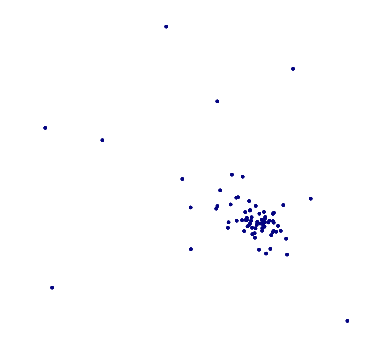

In [5]:
mapping.pca_plot()
plt.show()

In [6]:
mapping.apply_mapping()

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Train on 100000 samples, validate on 2474 samples
Epoch 1/10
100000/100000 [==============================] - 29s 288us/step - loss: 0.4866 - val_loss: 0.6025
Epoch 2/10
100000/100000 [==============================] - 28s 283us/step - loss: 0.4417 - val_loss: 0.6135
Epoch 3/10
100000/100000 [==============================] - 28s 284us/step - loss: 0.4277 - val_loss: 0.6193
Epoch 4/10
100000/100000 [==============================] - 31s 307us/step - loss: 0.4185 - val_loss: 0.6227
Epoch 5/10
100000/100000 [==============================] - 32s 323us/step - loss: 0.4110 - val_loss: 0.6254
Epoch 6/10
100000/100000 [==============================] - 34s 338us/step - loss: 0.4054 - val_loss: 0.6273
Epoch 7/10
100000/100000 [==============================] - 34s 341us/step - loss: 0.4006 - val_loss: 0.6284
Epoch 8/10
100000/100000 [==============================] - 34s 335us/step - loss: 0.3963 - val_loss: 0.6277
Epoch 9/10
100000/100000 [==============================] - 36s 362us/step - l

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.  1.  0. ...,  0.  1.  1.] None


[0.84167237834132969, 0.83361588762412209, 0.0, 0.00085616438356164379]

In [7]:
y_pred = cluster.predictions.y_pred
y_true = cluster.subjects.get_charge_array()[1]
print(y_pred.size)
print(y_true.size)
print(len(subjects2))
agg.data['subjects']

9897
4938603
9897


{1: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 49154: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0],
 49155: [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 32774: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 16391: [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 16392: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 45282: [0,
  0,
  0,

In [8]:
pred=mapping.cluster.predict()

/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/larai002/.virtualenv/lucifer/muon/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [9]:
print(pred.cluster_mapping)

    n_assigned  majority_class  majority_class_fraction
0            9               0                 1.000000
1            0               0                      NaN
2            0               0                      NaN
3            2               0                 1.000000
4            0               0                      NaN
5          306               0                 0.977124
6            0               0                      NaN
7            0               0                      NaN
8            1               1                 1.000000
9            0               0                      NaN
10           0               0                      NaN
11           0               0                      NaN
12          12               0                 1.000000
13           0               0                      NaN
14           4               0                 1.000000
15           0               0                      NaN
16           0               0                  

number of subjects 1409


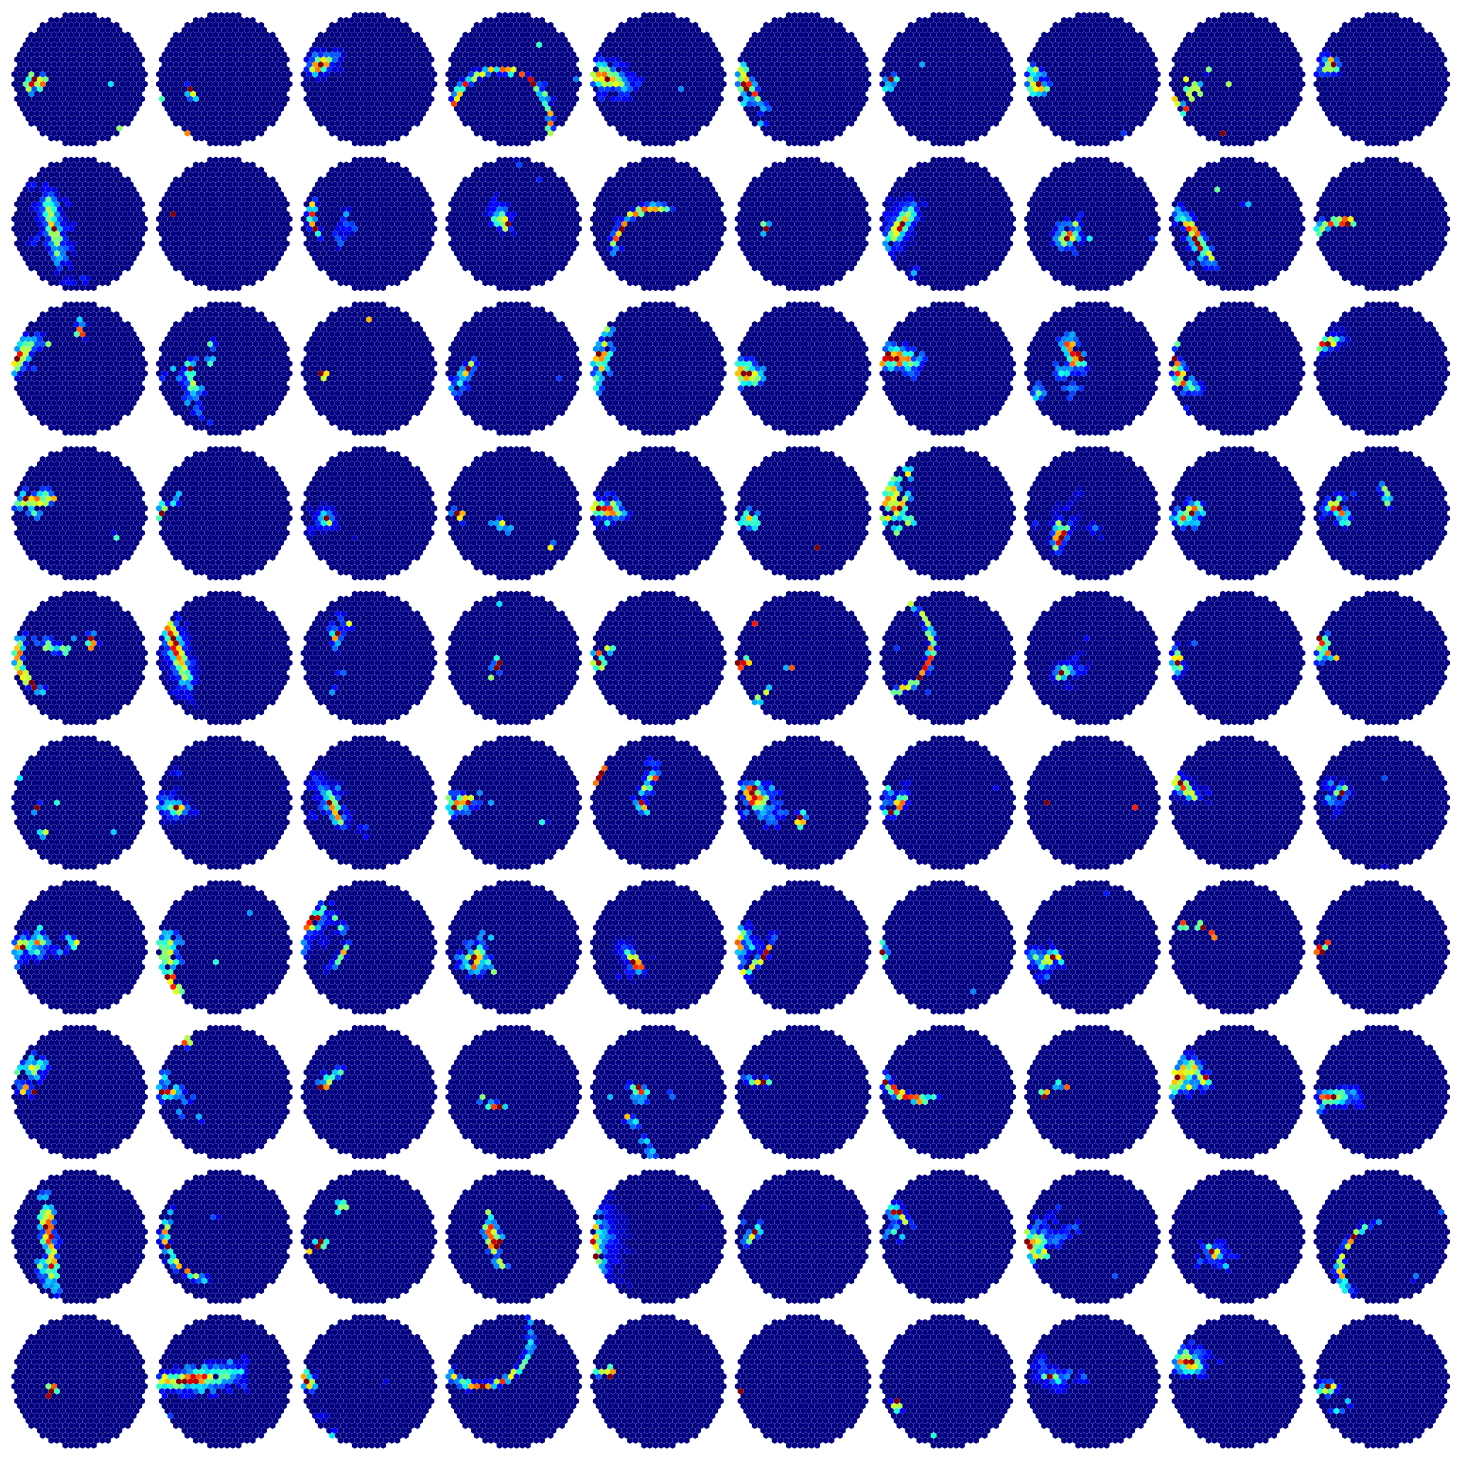

In [10]:
pred.cluster_subjects(27).plot_sample(100, w=10)
plt.show()

number of subjects 7780


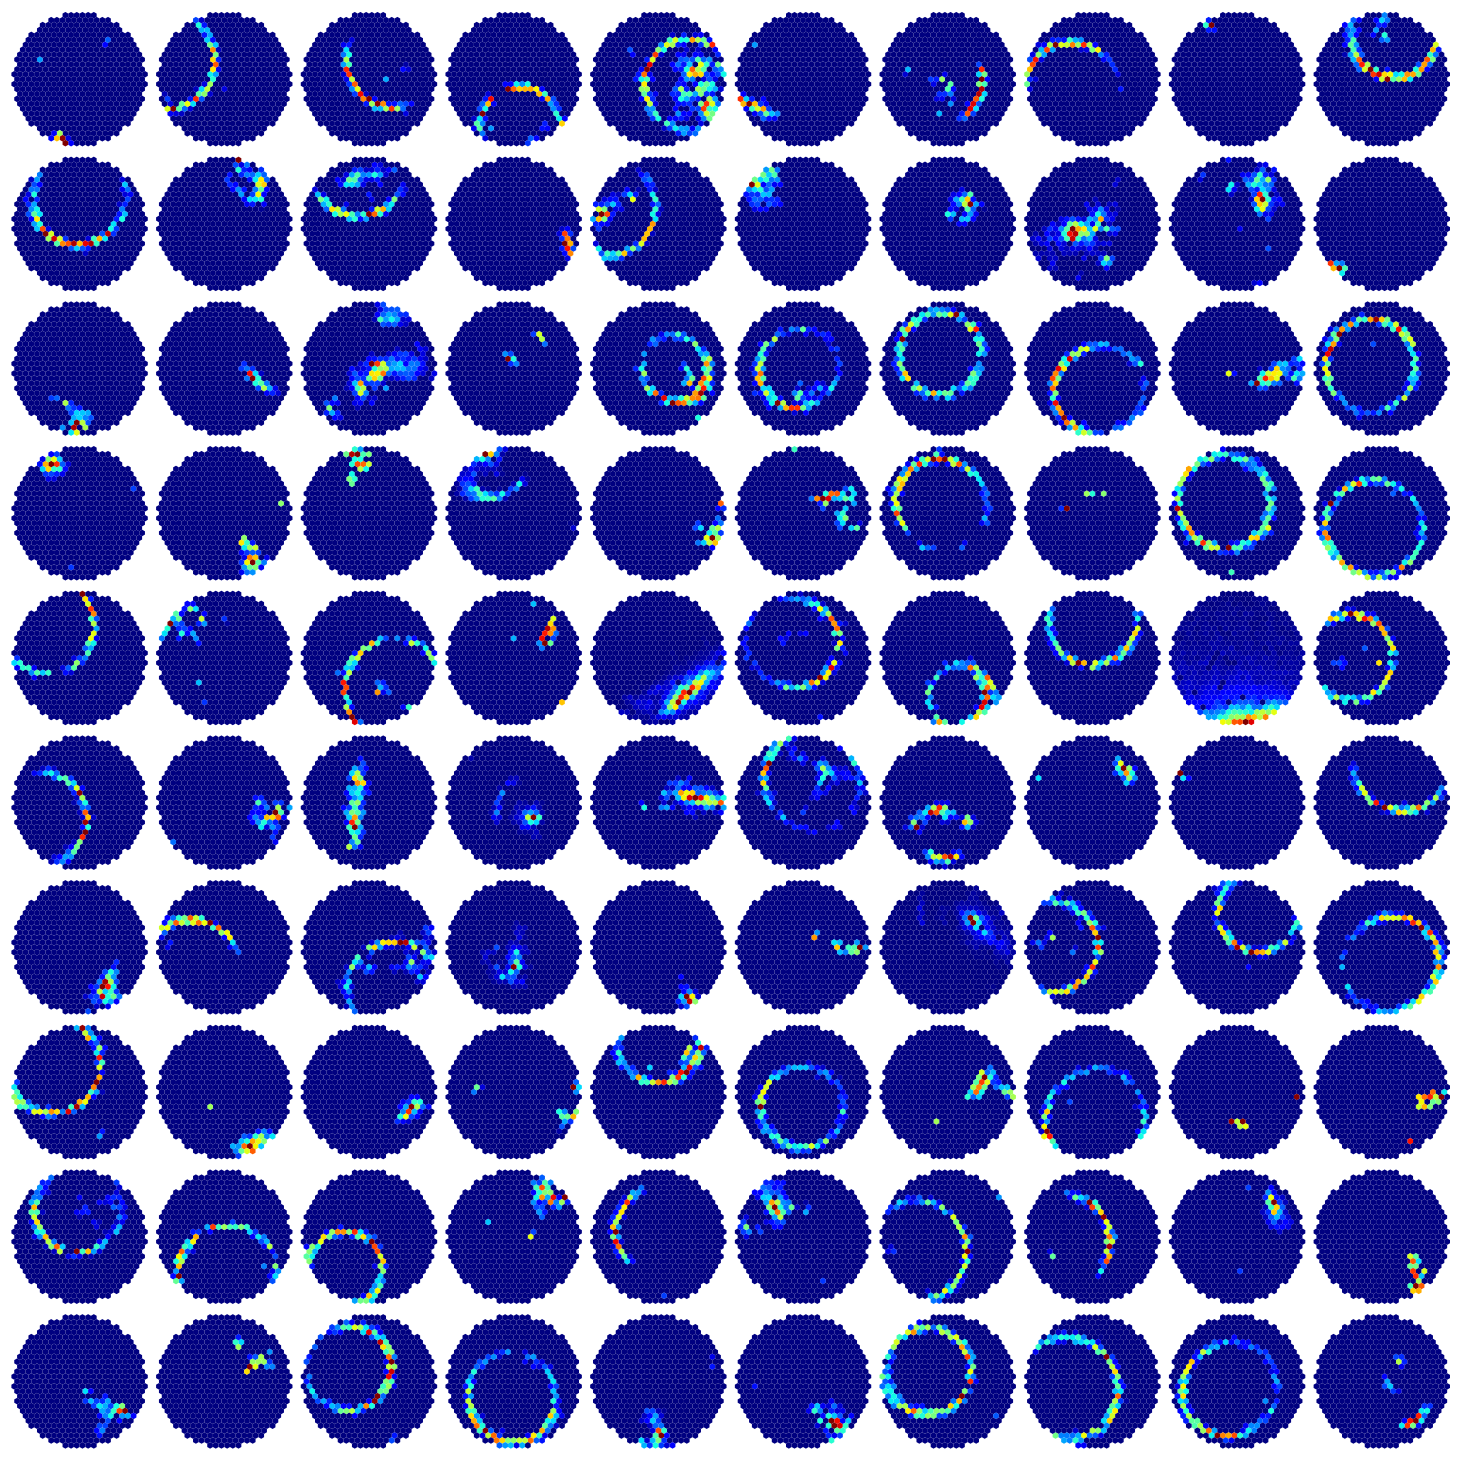

In [11]:
pred.cluster_subjects(49).plot_sample(100, w=10)
plt.show()